In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [95]:
#reading dataset
df= pd.read_csv('temperatures.csv')

In [96]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [97]:
#data wrangling
print("number of missing values :", df.isnull().sum().sum())
print("number of zeroes :", (df==0).sum().sum())

number of missing values : 0
number of zeroes : 0


In [98]:
print("the total number of samples :", df.shape[0])
print("the total number of features :", df.shape[1])

the total number of samples : 117
the total number of features : 18


In [99]:
temp = df.loc[:,'JAN':'DEC']
temp.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49
1,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04
2,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65
3,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63
4,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82


In [100]:
data = df.drop(columns =['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
data.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,28.96,23.27,31.46,31.27,27.25
1,1902,29.22,25.75,31.76,31.09,26.49
2,1903,28.47,24.24,30.71,30.92,26.26
3,1904,28.49,23.62,30.95,30.66,26.40
4,1905,28.30,22.25,30.00,31.33,26.57


In [101]:
#finding the PCA for monthly data
scaler= StandardScaler()
temp=scaler.fit_transform(temp)
pca =PCA(n_components=1)
pca_result = pca.fit_transform(temp)
data['PCA1']= pca_result
data.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC,PCA1
0,1901,28.96,23.27,31.46,31.27,27.25,-0.689853
1,1902,29.22,25.75,31.76,31.09,26.49,-0.428795
2,1903,28.47,24.24,30.71,30.92,26.26,-2.710225
3,1904,28.49,23.62,30.95,30.66,26.40,-3.380420
4,1905,28.30,22.25,30.00,31.33,26.57,-2.093893


In [102]:
cor_matrix= data.drop(columns=['PCA1']).corrwith(data['PCA1']).abs()
sorted_cor_matrix = cor_matrix.sort_values(ascending=False)
print("the sorted correlation matrix is : \n",sorted_cor_matrix)
feature_1 = sorted_cor_matrix.index[0]
feature_2 =sorted_cor_matrix.index[1]
print("the highest correlated feature is :", feature_1)
print("the second highest correlated feature is :", feature_2)

the sorted correlation matrix is : 
 ANNUAL     0.988512
OCT-DEC    0.917755
JUN-SEP    0.859390
MAR-MAY    0.810007
JAN-FEB    0.802486
YEAR       0.796998
dtype: float64
the highest correlated feature is : ANNUAL
the second highest correlated feature is : OCT-DEC


In [103]:
x_single = data[[feature_1]]
y= data['PCA1']
train_sse=[]
test_sse=[]
train_size = np.arange(0.1,1.0,0.1)
for t in train_size:
    x_train,x_test,y_train,y_test = train_test_split(x_single,y,test_size=1-t,random_state=42)
    model= LinearRegression()
    model.fit(x_train,y_train)
    tr_pred =model.predict(x_train)
    te_pred =model.predict(x_test)
    tr_sse= np.sum((y_train-tr_pred)**2)
    te_sse = np.sum((y_test-te_pred)**2)

    train_sse.append(tr_sse)
    test_sse.append(te_sse)
 
train_sse=np.array(train_sse)
test_sse=np.array(test_sse)

error_ratio= np.abs(test_sse - train_sse)
balanced_ratio =np.argmin(error_ratio)
optimal_train_size= train_size[balanced_ratio]
print("the optimal training size is: ", optimal_train_size)
    
    

the optimal training size is:  0.5


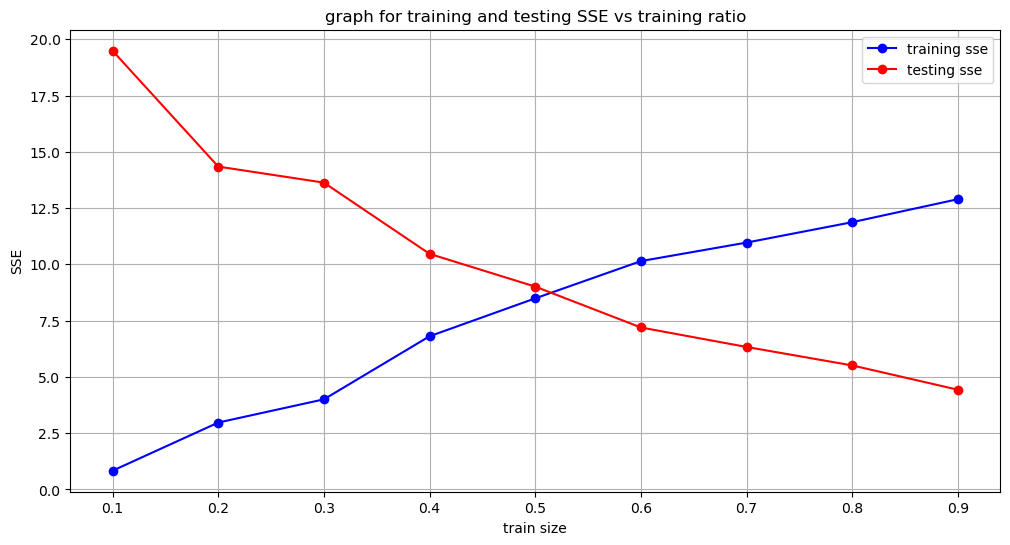

In [104]:
#plotting graph for sse and train ratio
plt.figure(figsize=(12,6))
plt.title("graph for training and testing SSE vs training ratio")
plt.plot(train_size, train_sse, label="training sse", color ='blue',marker='o')
plt.plot(train_size, test_sse, label="testing sse",color='red',marker='o')
plt.xlabel("train size")
plt.ylabel("SSE")
plt.legend()
plt.grid(True)
plt.show()

In [105]:
x_train,x_test,y_train,y_test= train_test_split(x_single, y, test_size = 1-optimal_train_size, random_state=1)
model.fit(x_train, y_train)
tr_pred = model.predict(x_train)
te_pred = model.predict(x_test)

tr_mse = mean_squared_error(y_train,tr_pred)
te_mse =mean_squared_error(y_test, te_pred)
tr_mae =mean_absolute_error(y_train,tr_pred)
te_mae =mean_absolute_error(y_test, te_pred)
r2_tr= r2_score(y_train,tr_pred)
r2_te =r2_score(y_test,te_pred)

print(f"training MSE : {tr_mse :.3f}")
print(f"training MAE : {tr_mae :.3f}")
print(f"training r2 score : {r2_tr :.3f}")
print(f"testing MSE : {te_mse :.3f}")
print(f"testing MAE : {te_mae :.3f}")
print(f"r2 score testing : {r2_te :.3f}")

training MSE : 0.111
training MAE : 0.271
training r2 score : 0.983
testing MSE : 0.187
testing MAE : 0.293
r2 score testing : 0.970


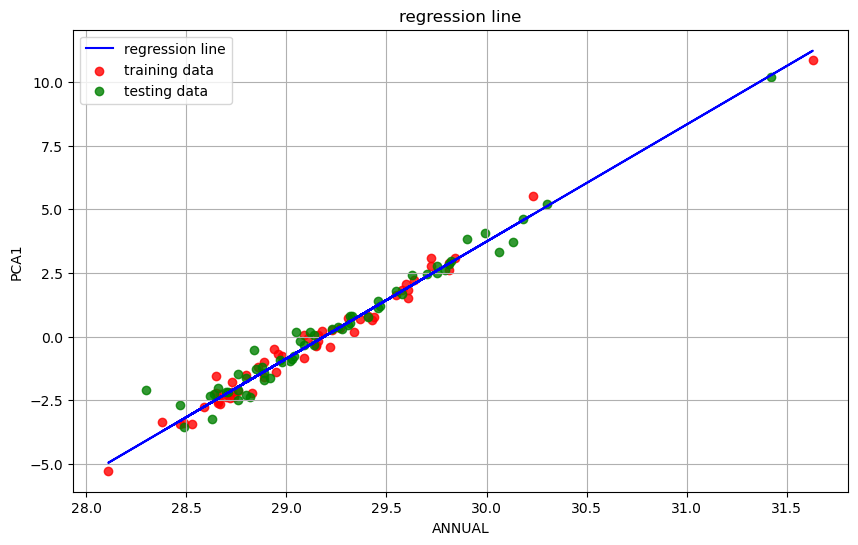

In [106]:
plt.figure(figsize=(10,6))
plt.title("regression line")
plt.plot(x_train, tr_pred, color='blue',label='regression line')
plt.scatter(x_train,y_train,color='red',label='training data',marker='o',alpha=0.8)
plt.scatter(x_test,y_test,color='green',label="testing data",marker='o',alpha=0.8)
plt.xlabel(feature_1)
plt.ylabel("PCA1")
plt.legend()
plt.grid(True)
plt.show()


In [107]:
x_double = data[[feature_1,feature_2]]
y=data['PCA1']
x_tr,x_te,y_tr,y_te =train_test_split(x_double,y, test_size=0.25, random_state=1)
model.fit(x_tr,y_tr)
tr3_pred =model.predict(x_tr)
te3_pred =model.predict(x_te)

tr3_mse =mean_squared_error(y_tr,tr3_pred)
tr3_mae =mean_absolute_error(y_tr,tr3_pred)
tr3_r2=r2_score(y_tr,tr3_pred)

te3_mse =mean_squared_error(y_te,te3_pred)
te3_mae =mean_absolute_error(y_te,te3_pred)
te3_r2=r2_score(y_te,te3_pred)

print(f"training MSE : {tr3_mse :.3f}")
print(f"training MAE : {tr3_mae :.3f}")
print(f"training r2 score : {tr3_r2 :.3f}")
print(f"testing MSE : {te3_mse :.3f}")
print(f"testing MAE : {te3_mae :.3f}")
print(f"r2 score testing : {te3_r2 :.3f}")

training MSE : 0.108
training MAE : 0.229
training r2 score : 0.985
testing MSE : 0.141
testing MAE : 0.245
r2 score testing : 0.968


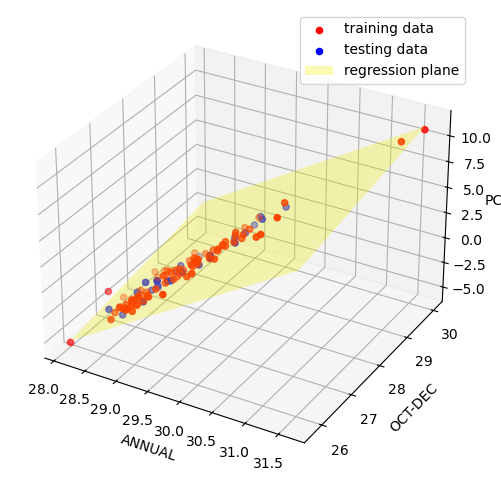

In [108]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(111,projection='3d')
xx,yy= np.meshgrid(np.linspace(min(x_tr[feature_1].min(),x_te[feature_1].min()),max(x_tr[feature_1].max(),x_te[feature_1].max()),50),
                    np.linspace(min(x_tr[feature_2].min(),x_te[feature_2].min()),max(x_tr[feature_2].max(),x_te[feature_2].max()),50))
zz= model.intercept_ + model.coef_[0]*xx + model.coef_[1]*yy
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel('PCA1')
ax.scatter(x_tr[feature_1],x_tr[feature_2],y_tr, color='red', marker='o', label='training data')
ax.scatter(x_te[feature_1],x_te[feature_2],y_te,color='blue', marker='o',label='testing data')
ax.plot_surface(xx,yy,zz ,color='yellow', alpha=0.3, label ='regression plane')
ax.legend()
plt.show()